# Scraping and Cleaning the Data for the Toronto Post Code Dataset

## First part - Scrapping and cleaning the data

In [3]:
!conda install -c conda-forge geocoder -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geocoder-1.38.1            |             py_1          53 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    ratelim-0.1.6              |             py_2           6 KB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geocoder:        1.38.1-py_1       conda-forge
    ratelim:         0.1.6-py_2        conda-forge

The following packages will be UPDATED:

    

In [70]:
import pandas as pd
import html5lib

In [71]:
url= 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

In [72]:
tables = pd.read_html(url)

In [73]:
tables[0].head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [74]:
df = tables[0]
df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [75]:
df2 = df[~df['Borough'].isin(['Not assigned'])]

In [76]:
df2.head(10)

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Not assigned
10,M9A,Etobicoke,Islington Avenue
11,M1B,Scarborough,Rouge
12,M1B,Scarborough,Malvern


In [77]:
df3 = df2.groupby(['Postcode','Borough'], sort = False).agg(lambda x: ','.join(x))

In [78]:
df3.head(10)

,,Neighbourhood
Postcode,Borough,
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,"Harbourfront,Regent Park"
M6A,North York,"Lawrence Heights,Lawrence Manor"
M7A,Queen's Park,Not assigned
M9A,Etobicoke,Islington Avenue
M1B,Scarborough,"Rouge,Malvern"
M3B,North York,Don Mills North
M4B,East York,"Woodbine Gardens,Parkview Hill"


In [79]:
df3.sort_values(by=['Postcode'], inplace=True)


In [80]:
df3.head()

,,Neighbourhood
Postcode,Borough,
M1B,Scarborough,"Rouge,Malvern"
M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
M1E,Scarborough,"Guildwood,Morningside,West Hill"
M1G,Scarborough,Woburn
M1H,Scarborough,Cedarbrae


In [81]:
df4 = df3['Neighbourhood'].replace('Not assigned', df['Borough'])

In [82]:
df5 = df3.reset_index()

In [83]:
df5.head()

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


### How the dataset was cleaned
In the previous lines, the data were cleaned by removing Not assigned values from the dataset and the values were grouped by the Borough afterward. Missing data in the column Neighbourhood were replaced by the values from the Borough column.

## Second part - Getting locations

In [84]:
import requests
from geopy.geocoders import Nominatim

In [85]:
import pandas as pd
url="http://cocl.us/Geospatial_data"
latlon_df=pd.read_csv(url)

In [86]:
latlon_df.head(5)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [87]:
latlon_df.sort_values(by=['Postal Code'], inplace=True)

In [88]:
latlon_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [89]:
df3.head()

,,Neighbourhood
Postcode,Borough,
M1B,Scarborough,"Rouge,Malvern"
M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
M1E,Scarborough,"Guildwood,Morningside,West Hill"
M1G,Scarborough,Woburn
M1H,Scarborough,Cedarbrae


In [90]:
result = pd.concat([df5, latlon_df], axis=1, sort=False)

In [91]:
result.head(15)

,Postcode,Borough,Neighbourhood,Postal Code,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",M1B,43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",M1C,43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",M1E,43.763573,-79.188711
3,M1G,Scarborough,Woburn,M1G,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,M1H,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,M1J,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",M1K,43.727929,-79.262029
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge",M1L,43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",M1M,43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff,Cliffside West",M1N,43.692657,-79.264848


In [92]:
df_final=result.drop(['Postal Code'], axis=1)

In [93]:
df_final.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


## Third Part - Clustering

In [27]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-3.1.0               |           py36_0         724 KB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be 

In [94]:
import folium
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter



In [95]:
df_final.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [96]:
X=df_final.drop(['Neighbourhood','Postcode','Borough'], axis=1)

In [97]:
X.head()

,Latitude,Longitude
0,43.806686,-79.194353
1,43.784535,-79.160497
2,43.763573,-79.188711
3,43.770992,-79.216917
4,43.773136,-79.239476


In [98]:
id_n=8
kmeans = KMeans(n_clusters=id_n, random_state=0).fit(X)
id_label = kmeans.labels_

In [99]:
id_label

array([5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 3, 3, 5, 3, 3, 3, 5, 3, 3, 7, 7, 7,
       7, 7, 7, 3, 7, 1, 7, 2, 2, 2, 2, 2, 1, 1, 1, 1, 6, 1, 1, 6, 1, 6,
       7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 0, 6,
       6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 6, 4, 1,
       4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2], dtype=int32)

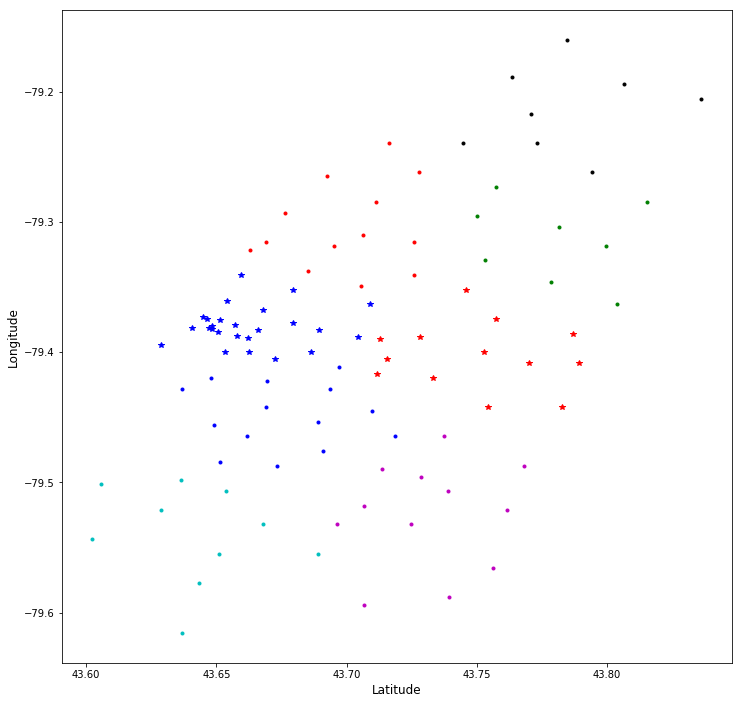

In [100]:
plt.figure(figsize=(12,12))
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
for i in range(id_n):
    cluster=np.where(id_label==i)[0]
    plt.plot(X.Latitude[cluster].values,X.Longitude[cluster].values,ptsymb[i])
plt.show()



### Explanation
The code above creates a separate data frame X which stores only geospatial values. The variable X is then implemented into the k-means clustering algorithm. The results are displayed in the row id_labels. The distribution of values is displayed in the graph above. 